## Time Series and Technical Analysis of Some Cryptocurrencies

In [6]:
!pip install yfinance --upgrade --no-cache-dir --quiet

In [7]:
url = 'https://launchpad.net/~mario-mariomedina/+archive/ubuntu/talib/+files'
ext = '0.4.0-oneiric1_amd64.deb -qO'
!wget $url/libta-lib0_$ext libta.deb
!wget $url/ta-lib0-dev_$ext ta.deb
!dpkg -i libta.deb ta.deb
!pip install ta-lib --quiet
import talib

(Reading database ... 155248 files and directories currently installed.)
Preparing to unpack libta.deb ...
Unpacking libta-lib0 (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Preparing to unpack ta.deb ...
Unpacking ta-lib0-dev (0.4.0-oneiric1) over (0.4.0-oneiric1) ...
Setting up libta-lib0 (0.4.0-oneiric1) ...
Setting up ta-lib0-dev (0.4.0-oneiric1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link



In [8]:
#Import useful libraries for analysis
import warnings


from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import pandas as pd
import numpy as np
import talib
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import pandas_datareader.data as pdr
import plotly.graph_objects as go
import yfinance as yf

In [9]:
yf.pdr_override()

In [10]:
start = datetime(2020,12,1)

end = datetime.now().date().isoformat()

In [11]:
btc = yf.download("BTC-USD", start=start, end=end)
eth = yf.download("ETH-USD", start=start, end=end)
bnb = yf.download("BNB-USD", start=start, end=end)
doge = yf.download("DOGE-USD", start=start, end=end)
ada = yf.download("ADA-USD", start=start, end=end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [12]:
btc.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,19633.769531,19845.974609,18321.921875,18802.998047,18802.998047,49633658712
2020-12-02,18801.744141,19308.330078,18347.718750,19201.091797,19201.091797,37387697139
2020-12-03,19205.925781,19566.191406,18925.785156,19445.398438,19445.398438,31930317405
2020-12-04,19446.966797,19511.404297,18697.193359,18699.765625,18699.765625,33872388058
2020-12-05,18698.384766,19160.449219,18590.193359,19154.230469,19154.230469,27242455064


In [13]:
eth.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,615.070312,635.160583,571.753967,587.324158,587.324158,27178964465
2020-12-02,587.261597,604.022461,578.741028,598.352356,598.352356,16883292129
2020-12-03,598.459229,622.452698,588.346375,616.708740,616.708740,16146190946
2020-12-04,616.722778,618.983154,569.283508,569.354187,569.354187,16337589997


In [14]:
bnb.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,31.411509,31.871908,29.484135,30.108303,30.108303,467818960
2020-12-02,30.147505,30.910141,29.748901,30.297361,30.297361,371441750
2020-12-03,30.303986,30.769117,29.978310,30.704430,30.704430,324897560
2020-12-04,30.716002,31.116619,28.925531,29.072208,29.072208,362626786


In [15]:
doge.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,0.003551,0.003572,0.003269,0.003335,0.003335,80163603
2020-12-02,0.003335,0.003436,0.003293,0.003374,0.003374,58705661
2020-12-03,0.003375,0.003500,0.003352,0.003428,0.003428,47907032
2020-12-04,0.003429,0.003447,0.003285,0.003298,0.003298,45062222


In [16]:
ada.head(4)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,0.171367,0.173851,0.146573,0.155983,0.155983,2071556994
2020-12-02,0.155956,0.159662,0.151429,0.158557,0.158557,1367595805
2020-12-03,0.158592,0.168009,0.155936,0.164212,0.164212,1287927035
2020-12-04,0.164209,0.164506,0.146964,0.148241,0.148241,1200621758


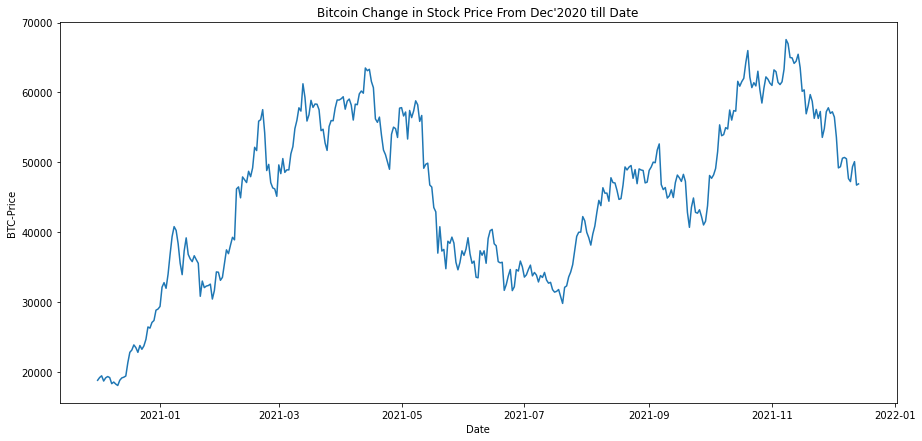

In [17]:
plt.figure(figsize=(15,7))
plt.plot(btc['Adj Close'])
plt.ylabel("BTC-Price")
plt.xlabel("Date")
plt.title("Bitcoin Change in Stock Price From Dec'2020 till Date")
plt.show()

No handles with labels found to put in legend.


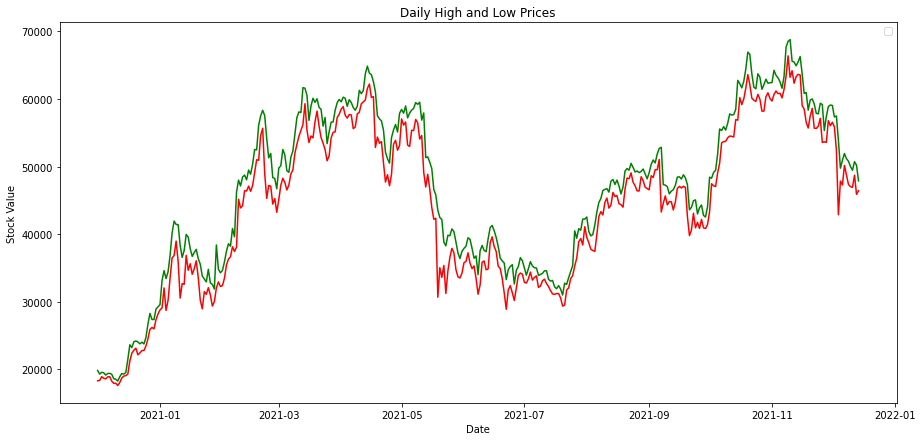

In [18]:
plt.figure(figsize=(15,7))
plt.plot(btc['High'], color='green')
plt.plot(btc['Low'], color='red')
plt.title('Daily High and Low Prices')
plt.xlabel('Date')
plt.ylabel('Stock Value')
plt.legend()
plt.show()

In [19]:
candlestick = go.Candlestick(x = btc.index,
                             open = btc['Open'], 
                             high = btc['High'],
                             low = btc['Low'],
                             close = btc['Close'])
fig = go.Figure(data=[candlestick])
fig.show()

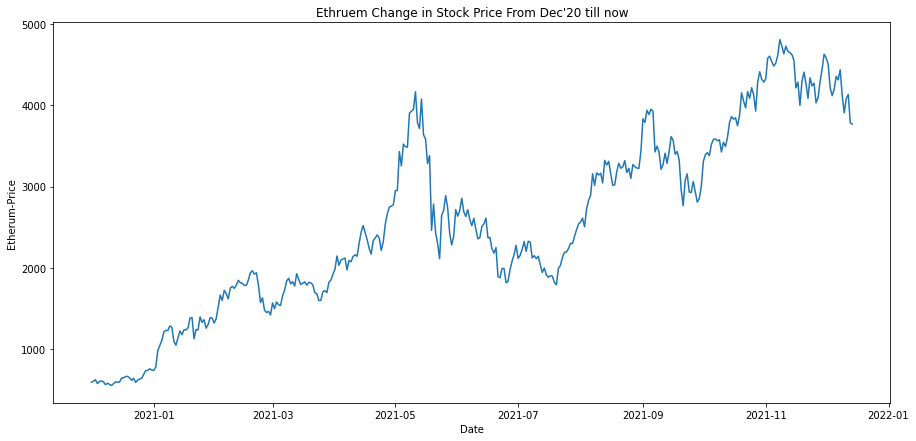

In [20]:
plt.figure(figsize=(15,7))
plt.plot(eth['Adj Close'])
plt.ylabel("Etherum-Price")
plt.xlabel("Date")
plt.title("Ethruem Change in Stock Price From Dec'20 till now")
plt.show()

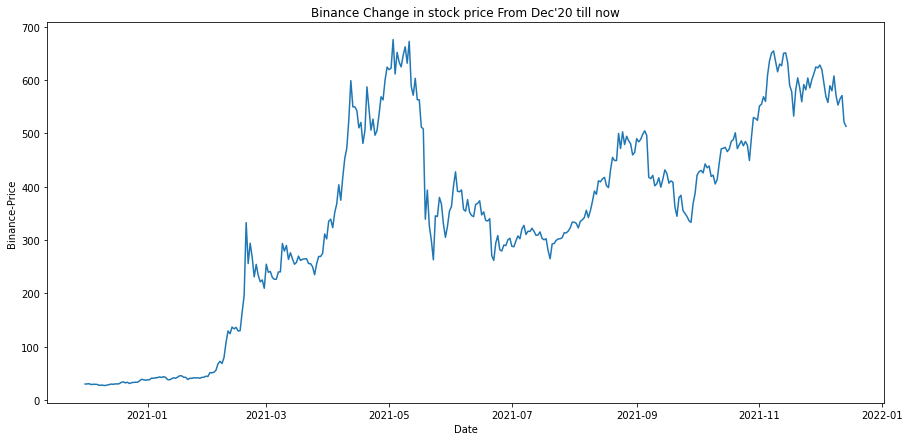

In [21]:
plt.figure(figsize=(15,7))
plt.plot(bnb['Adj Close'])
plt.ylabel("Binance-Price")
plt.xlabel("Date")
plt.title("Binance Change in stock price From Dec'20 till now")
plt.show()

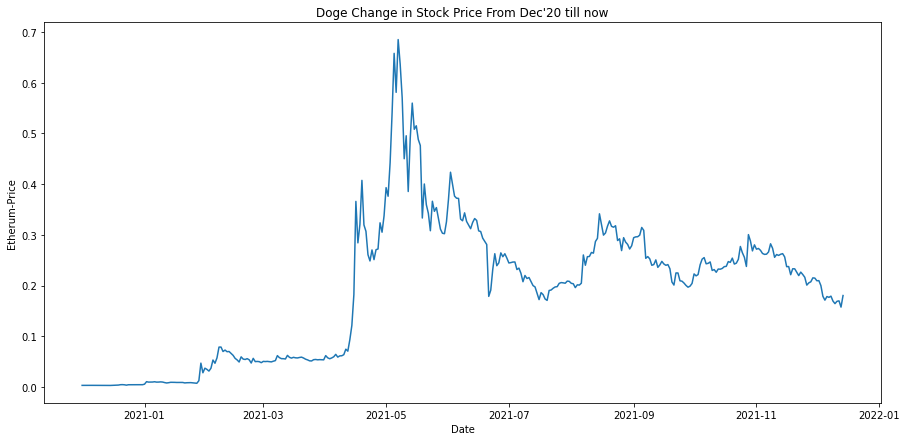

In [22]:
plt.figure(figsize=(15,7))
plt.plot(doge['Adj Close'])
plt.ylabel("Etherum-Price")
plt.xlabel("Date")
plt.title("Doge Change in Stock Price From Dec'20 till now")
plt.show()

>Depending on the kind of trader your analyzing the data for, you can resample the data to suit the needs of the trader. 

In [23]:
#Day traders generally want to see their stock hourly changes and prices.
#btc_daily = btc.resample('H').mean()

#For Swing traders 
#btc_daily = btc.resample('D').mean()

#For Position traders
#btc_daily = btc.resample('W').mean()

#### Volume of Trade 

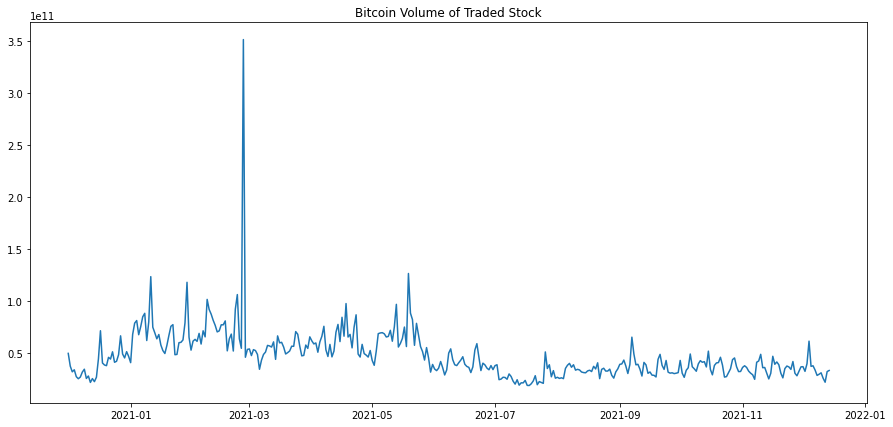

In [24]:
plt.figure(figsize=(15,7))
plt.plot(btc['Volume'])
plt.title("Bitcoin Volume of Traded Stock")
plt.show()

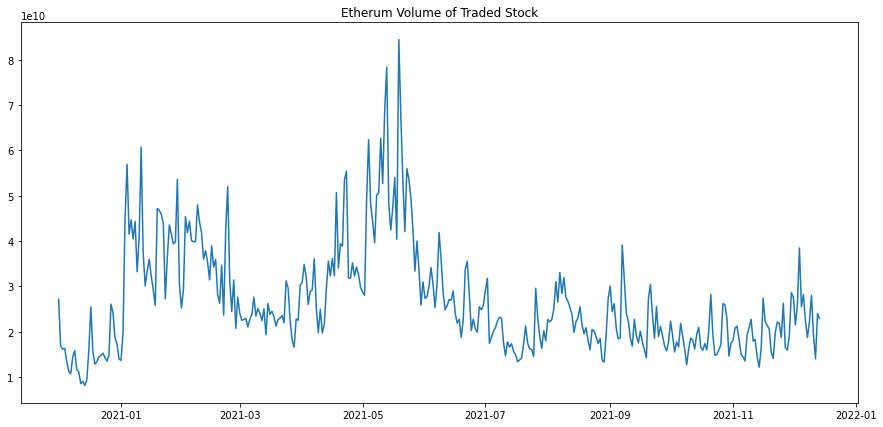

In [25]:
plt.figure(figsize=(15,7))
plt.plot(eth['Volume'])
plt.title("Etherum Volume of Traded Stock")
plt.show()

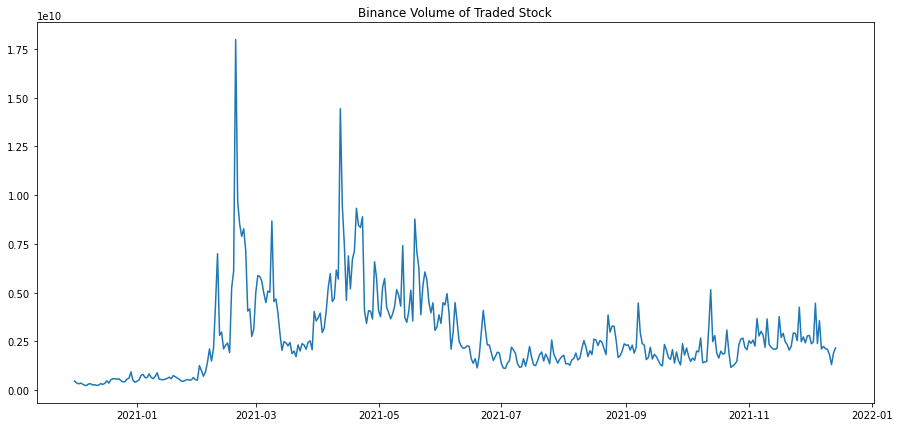

In [26]:
plt.figure(figsize=(15,7))
plt.plot(bnb['Volume'])
plt.title("Binance Volume of Traded Stock")
plt.show()

From the analysis above, it can be seen that bitcoin had the most traded volumn. Bitcoin had it's highest volumn in march 2021. 

#### Let's see the average traded volumn of these coins:

In [27]:
average_btc = btc['Volume'].mean()

average_eth = eth['Volume'].mean()

average_bnb = bnb['Volume'].mean()

average_doge = doge['Volume'].mean()

average_ada = ada['Volume'].mean()

print(f"Average traded volumn of Bitcoin: {average_btc}")

print(f"Average traded volumn of Etherum: {average_eth}")

print(f"Average traded volumn of Binance: {average_bnb}")

print(f"Average traded volumn of Doge: {average_doge}")

print(f"Average traded volumn of Ada: {average_ada}")

Average traded volumn of Bitcoin: 47363120936.3905
Average traded volumn of Etherum: 26783640992.271767
Average traded volumn of Binance: 2701116777.6385226
Average traded volumn of Doge: 3932267049.754617
Average traded volumn of Ada: 4092134379.9894457


## What was the average daily return of bitcoin?

In [28]:
#To calculate the average daily return, we will use the percentage change of the adjusted closing price. Ie the difference expressed in percentages
#A positive value indicates a percentage increase and a negative value indicates a percentage decrease
#This helps us understand the volatility profile of a financial asset

btc['Daily Return'] = btc['Adj Close'].pct_change()


btc['Daily Return'].head()

Date
2020-12-01         NaN
2020-12-02    0.021172
2020-12-03    0.012724
2020-12-04   -0.038345
2020-12-05    0.024303
Name: Daily Return, dtype: float64

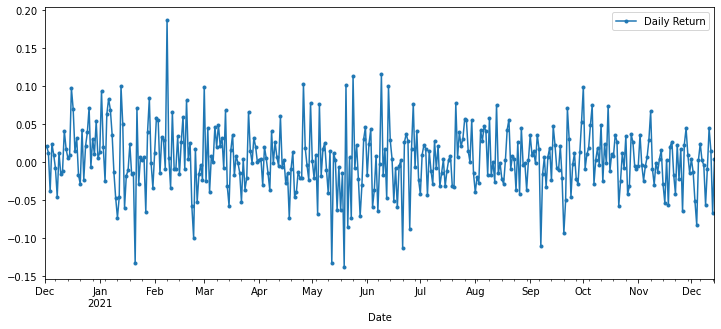

In [29]:
btc['Daily Return'].plot(marker='.', legend=True, figsize=(12,5))

Let's take a closer on the daily return using a histogram

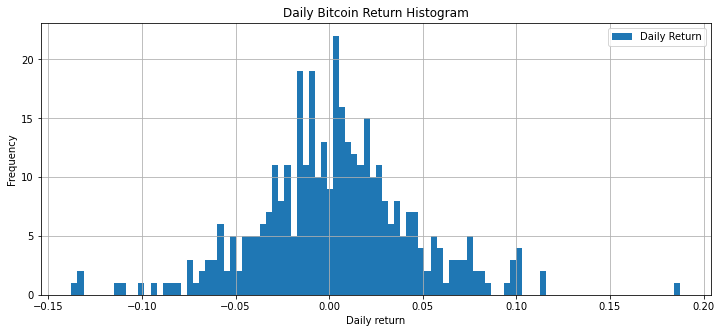

In [30]:
btc['Daily Return'].hist(bins=100, legend=True, figsize=(12,5))
plt.ylabel('Frequency')
plt.xlabel('Daily return')
plt.title("Daily Bitcoin Return Histogram")
plt.show()

In [31]:
crypto = btc[['Adj Close']]


crypto['ETH'] = eth['Adj Close']
crypto['BNB'] = bnb['Adj Close']
crypto['DOGE'] = doge['Adj Close']
crypto['ADA'] = ada['Adj Close']

crypto = crypto.rename(columns={"Adj Close": "BTC"})

### Correlation of the coins

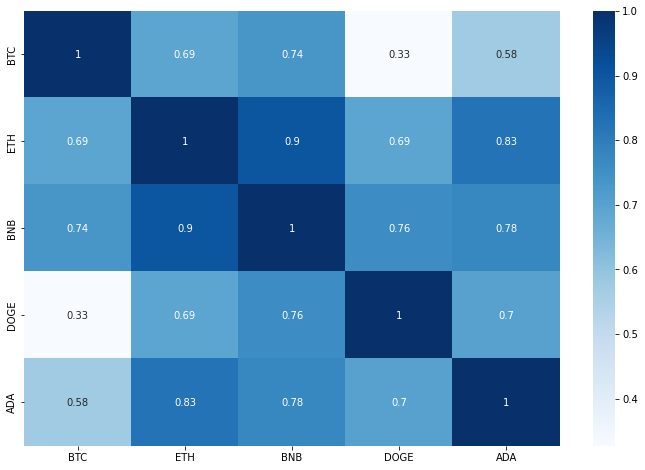

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(crypto.corr(), annot=True, cmap='Blues')

The above correlation map clearly shows that there is a strong correlation between all the altcoins and bitcoin

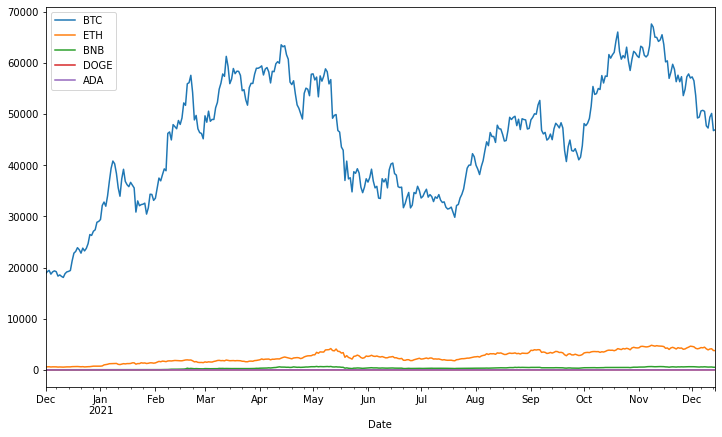

In [33]:
crypto.plot(kind='line', figsize=(12,7)).legend()

### Moving Average
To make sense of the data, we use technical indicators such as SMA - Simple moving average; it is the arithmetic mean of the price over a specified period

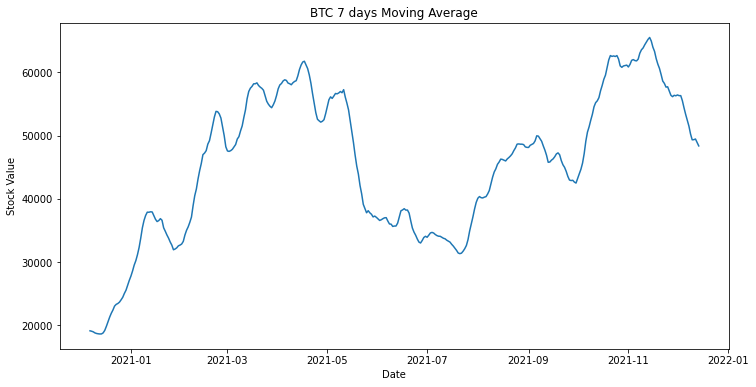

In [34]:
#Finally, lets have a look at BTC 7 day moving averages. It helps us to have a closer look

crypto["BTC_Moving_Average"] = crypto.BTC.rolling(7).mean()

plt.figure(figsize=(12,6))
plt.plot(crypto["BTC_Moving_Average"])
plt.title("BTC 7 days Moving Average")
plt.xlabel("Date")
plt.ylabel("Stock Value")
plt.show()

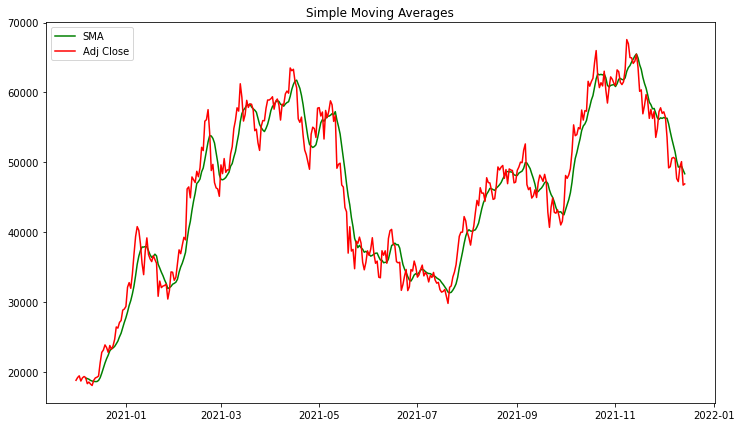

In [35]:
#Let plot both the moving average and the stock price together
plt.figure(figsize=(12,7))
plt.plot(crypto["BTC_Moving_Average"], color='green', label='SMA')
# Plot the Adjclose price
plt.plot(btc['Adj Close'], color='red', label='Adj Close')

plt.title('Simple Moving Averages')
plt.legend()
plt.show()

### ADX 

ADX - Measures the strength of a trend. It oscillates between 0 and 100. ADX is calulated by from the averages of the difference between +DI and -DI

+D - shows the presence of an uptrend
-D - shows the presence of a downtrend

ADX indicators:

*   ADX <=25 shows no trend
*   ADX >25 means a trending market
*   ADX >50 indicates a strong trending market




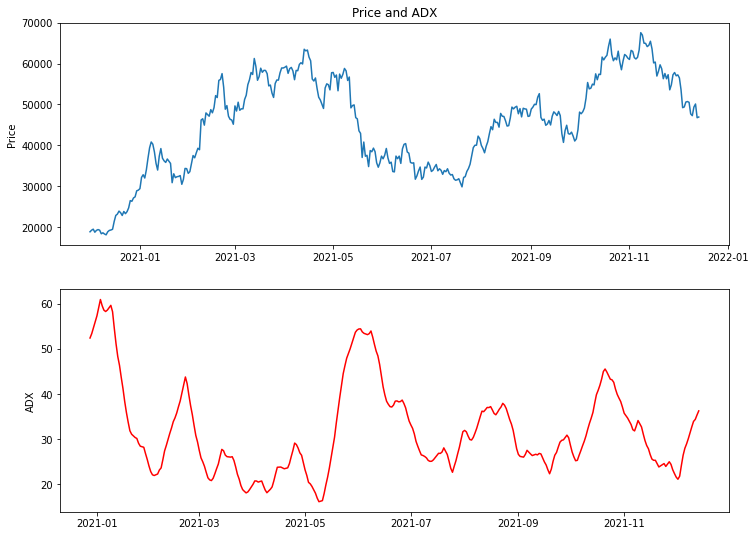

In [36]:
btc['ADX'] = talib.ADX(btc['High'], btc['Low'], btc['Close'], timeperiod=14)


fig, (ax1, ax2) = plt.subplots(2,figsize=(12,9))

# Plot ADX with the price
ax1.set_ylabel('Price')
ax1.plot(btc['Adj Close'])
ax2.set_ylabel('ADX')
ax2.plot(btc['ADX'], color='red')

ax1.set_title('Price and ADX')
plt.show()

#### In Conclusion

>It can be seen from the plot above that bitcoin has the highest stock value. The price of bitcoin grew fast around Feburary and There was a sharp reduction in the value of coins in May 2021. Although some coins have risen above the fall. Crypto market is highly volatile and not predictable.

From the trend above, you can clearly see when bitcoin has a trending market (ADX > 25) and when it has no trend. Generally, bitcoin Average ADX is above 25 meaning it is a trending market.